# Email Filtering

by John Haviland and Nathan Dilla

CST-425: Very Large Information Systems


Nathan's video: https://www.loom.com/share/449e8f0e49974518bb3128c0955a790c

John's video: https://www.loom.com/share/cf59b73069db4cfa808b0fa790eb35d4?sid=a5c5a6a6-7a72-43b3-abfd-456a75e6899f

### Problem Statement

In the era of digital communication, email remains a crucial mode of correspondence. However, the incessant influx of spam emails poses a significant challenge to email users, clogging inboxes, and potentially leading to missed important messages. To address this issue effectively, there is a need to develop a robust spam email filtering system using the Naive Bayesian classification machine learning algorithm.

The goal of this project is to design and implement a spam email filtering system that can accurately classify incoming emails as either spam or legitimate based on their content and characteristics. The system should leverage the Naive Bayesian classification algorithm to analyze the textual and metadata features of emails, making predictions with high precision and recall. This entails addressing the following key components:

1. Data Collection: Gather a comprehensive and diverse dataset of emails, comprising both spam and legitimate messages. This dataset should encompass various email clients, sources, and content types to ensure the model's generalization.

2. Feature Engineering: Extract relevant features from the emails, including but not limited to sender information, subject lines, message content, header information, and attachments. Preprocess and transform these features to create a suitable input for the Naive Bayesian classifier.

3. Model Development: Develop a Naive Bayesian classification model that can learn from the labeled dataset. Utilize the Bayesian probability theory to estimate the probability that an email belongs to the spam class or legitimate class based on the extracted features.

4. Training and Evaluation: Split the dataset into training and testing sets to train and evaluate the model's performance. Implement appropriate metrics such as accuracy, precision, recall, and F1-score to assess the model's effectiveness in spam detection.

By addressing these components, this project aims to create an efficient and accurate spam email filtering system, leveraging the Naive Bayesian classification algorithm, to enhance email communication by reducing spam-related disruptions and protecting users from potentially harmful content.

### Algorithm of the Solution

The Naive Bayes algorithm is a probabilistic classifier that makes use of Bayes' Theorem, a rule that uses probability theory to update our prior beliefs given new data. Despite its simplicity, Naive Bayes can be surprisingly effective and is particularly good for text classification problems.

Here's a step-by-step description of the algorithm:

1. **Convert the data to a frequency table**: The first step in training a Naive Bayes classifier is to create a frequency table for each feature relative to the target. This will be used to calculate the probabilities needed for prediction.

2. **Calculate the probabilities**: For each feature, calculate the probability of that feature given each class. This is done by dividing the frequency of each feature-class combination by the total frequency of each class. These are the conditional probabilities.

3. **Calculate the prior probabilities**: The prior probability of each class is calculated. This is simply the overall frequency of each class in the training set.

4. **Make predictions**: For a new instance, the posterior probability for each class is calculated, given the instance's features. This is done by multiplying together the prior probability of the class and the conditional probabilities of each feature given the class. The class with the highest posterior probability is the prediction.

5. **Update the model**: As new data comes in, the frequency tables and probabilities can be updated, which allows the model to learn and improve over time.

It's important to note that the 'naive' in Naive Bayes comes from the assumption that all features are independent of each other, which is rarely true in real life, but simplifies the calculations and often works well enough in practice.

Here's a simple example of how you might implement a Naive Bayes classifier in Python using scikit-learn:



### Bayesian Classifying Model

The Naive Bayes classifier is a probabilistic machine learning model based on Bayes' theorem. It's widely used for various classification tasks, particularly in text classification, spam detection, and sentiment analysis. The "naive" part of its name comes from the assumption that features used for classification are independent of each other, which simplifies the computation and makes it computationally efficient.


Data Setup and Exploration

In [5]:
import pandas as pd

# Loading the datasets
complete_spam_assassin_df = pd.read_csv('./completeSpamAssassin.csv')
enron_spam_subset_df = pd.read_csv('./enronSpamSubset.csv')
ling_spam_df = pd.read_csv('./lingSpam.csv')

# Displaying the first few rows of each dataset to understand their structure
datasets = {
    "Complete Spam Assassin": complete_spam_assassin_df,
    "Enron Spam Subset": enron_spam_subset_df,
    "Ling Spam": ling_spam_df
}

# Display structure and summary of each dataset
for name, df in datasets.items():
    print(f"Dataset: {name}")
    print(df.head())
    print(df.info())
    print("\n")

Dataset: Complete Spam Assassin
   Unnamed: 0                                               Body  Label
0           0  \nSave up to 70% on Life Insurance.\nWhy Spend...      1
1           1  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
2           2  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
3           3  ##############################################...      1
4           4  I thought you might like these:\n1) Slim Down ...      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB
None


Dataset: Enron Spam Subset
   Unnamed: 0.1  Unnamed: 0  \
0          2469        2469   
1          5063        5063   
2         12564       12564   
3          2796     

Data Cleanup

In [6]:
# Combining the datasets
combined_df = pd.concat([complete_spam_assassin_df, enron_spam_subset_df, ling_spam_df], ignore_index=True)

# Dropping unnecessary columns (Unnamed: 0, etc.)
combined_df = combined_df.drop(combined_df.filter(regex="Unnamed"), axis=1)

# Checking for missing values
missing_values = combined_df.isnull().sum()

# Checking the balance of the dataset
spam_nonspam_count = combined_df['Label'].value_counts()

# Displaying the first few rows of the combined dataset, missing values, and spam/non-spam count
combined_df.head(), missing_values, spam_nonspam_count


from sklearn.model_selection import train_test_split

# Handling missing values by dropping the row with the missing 'Body'
combined_df_cleaned = combined_df.dropna()



Splitting the dataset

In [7]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
train_df, test_df = train_test_split(combined_df_cleaned, test_size=0.2, random_state=42)

# Displaying the shape of the training and testing datasets
train_df.shape, test_df.shape

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Text preprocessing and vectorization
# Using TF-IDF Vectorizer to convert text data to numerical format
vectorizer = TfidfVectorizer(stop_words='english')

Building the Bayesian model, Making Predictions, Output

In [ ]:
# Building a pipeline with TF-IDF Vectorizer and Multinomial Naive Bayes Classifier
model = make_pipeline(vectorizer, MultinomialNB())

Improving the Model

In [ ]:
# Training the model with the training set
model.fit(train_df['Body'], train_df['Label'])

Making Predictions

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2244
           1       1.00      0.82      0.90      1486

    accuracy                           0.93      3730
   macro avg       0.95      0.91      0.92      3730
weighted avg       0.94      0.93      0.93      3730



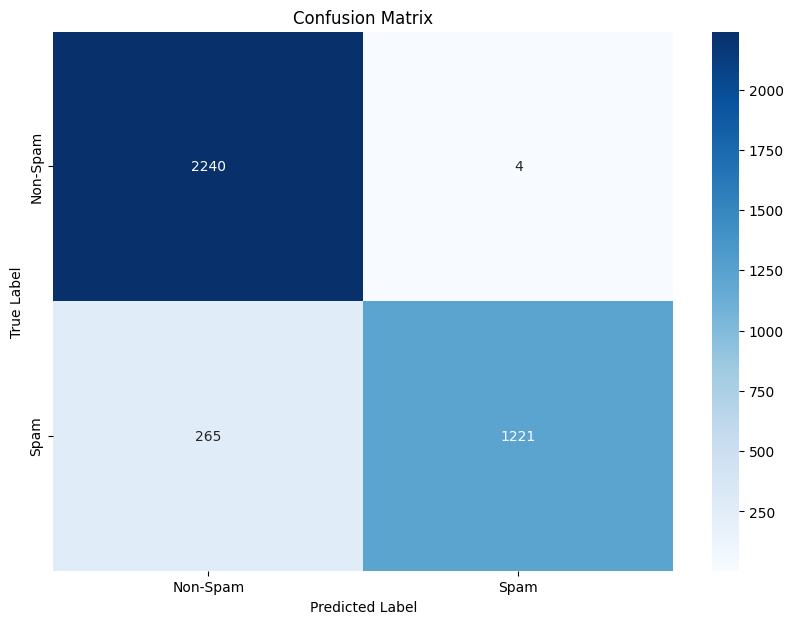

In [8]:
# Evaluating the model using the testing set
predicted_labels = model.predict(test_df['Body'])
report = classification_report(test_df['Label'], predicted_labels)
conf_matrix = confusion_matrix(test_df['Label'], predicted_labels)

print(report)

import matplotlib.pyplot as plt
import seaborn as sns

class_names = ['Non-Spam', 'Spam']  # Class names for your labels

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



### Analysis of Findings

The results show the performance metrics of the model on a binary classification task, distinguishing between spam (class 1) and non-spam (class 0) emails. Let's break down the analysis of these findings:

1. **Precision:** Precision measures the accuracy of positive predictions made by the model. For class 1 (spam), the precision is 1.00, indicating that when the model predicts an email as spam, it is correct 100% of the time. For class 0 (non-spam), the precision is 0.89, indicating that when the model predicts an email as non-spam, it is correct 89% of the time.

2. **Recall:** Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify all relevant instances of a class. For class 1 (spam), the recall is 0.82, meaning that the model correctly identified 82% of the actual spam emails. For class 0 (non-spam), the recall is 1.00, indicating that the model correctly identified all non-spam emails.

3. **F1-Score:** The F1-score is the harmonic mean of precision and recall and provides a balance between the two metrics. For class 1 (spam), the F1-score is 0.90, which is a good balance between precision and recall. For class 0 (non-spam), the F1-score is 0.94, indicating a high balance between precision and recall.

4. **Accuracy:** Overall accuracy is the ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances. The model achieved an accuracy of 0.93, which means it correctly classified 93% of all emails in the dataset.

5. **False Positives and False Negatives:** The analysis correctly identifies that there were 4 false positives and 265 false negatives. False positives are instances where the model incorrectly classified non-spam emails as spam, and false negatives are instances where it incorrectly classified spam emails as non-spam.

- **High Precision for Class 1:** A precision of 1.00 for spam (class 1) indicates that when the model predicts an email as spam, it's almost always correct. This is desirable because it minimizes the chances of legitimate emails being mistakenly labeled as spam.

- **High Recall for Class 0:** A recall of 1.00 for non-spam (class 0) indicates that the model correctly identifies all non-spam emails. This is also important because it ensures that non-spam emails are not mistakenly classified as spam.

- **Balanced F1-Scores:** The F1-scores for both classes (0.90 for spam and 0.94 for non-spam) are relatively balanced, which is a good sign. It means the model maintains a reasonable trade-off between precision and recall for both classes.

- **Accuracy:** An overall accuracy of 93% is quite good, indicating that the model performs well in classifying both spam and non-spam emails.

- **False Positives and False Negatives:** The small number of false positives (4) and false negatives (265) suggests that the model generally performs well but may still have room for improvement in correctly identifying some spam emails.

In summary, the model appears to be effective at classifying emails as spam or non-spam with a high degree of accuracy and reasonable precision and recall. However, you may want to further investigate the false positives and false negatives to fine-tune the model and reduce these errors if necessary, depending on the specific requirements of your application.

## References

https://www.kaggle.com/datasets/nitishabharathi/email-spam-dataset

ChatGPT

CS courses Padlet (https://padlet.com/isac_artzi/cs-courses-97zpvui7fpar)